# Predicción usando métodos de aprendizaje máquina

## Filtrado final y eliminación de filas con pH anómalo

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data_classified_wiw_09_11.csv')

# Eliminar columna de agrupamiento de años
col36_name = df.columns[36]
print("Eliminando la columna 36:", col36_name)
df = df.drop(columns=[col36_name])

df['DATE_CLEAN'] = pd.to_datetime(df['DATE_CLEAN'], errors='coerce')

Eliminando la columna 36: grupo


/tmp/ipython-input-1651486847.py:4: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_classified_wiw_09_11.csv')


In [2]:
# Eliminacion de valores anómalos de pH en función de sus otras variables

sub = df[(df['campaign'] == 31) & (df['pH'].notna())]
posiciones = [1,20,25]
indices_a_eliminar = sub.iloc[posiciones].index
df = df.drop(indices_a_eliminar)

sub = df[(df['campaign'] == 31) & (df['pH'].notna())]
posiciones = [17]
indices_a_eliminar = sub.iloc[posiciones].index
df = df.drop(indices_a_eliminar)

sub = df[(df['campaign'] == 32) & (df['pH'].notna())]
posiciones = [30]
indices_a_eliminar = sub.iloc[posiciones].index
df = df.drop(indices_a_eliminar)

sub = df[(df['campaign'] == 32) & (df['pH'].notna())]
posiciones = [37]
indices_a_eliminar = sub.iloc[posiciones].index
df = df.drop(indices_a_eliminar)

sub = df[(df['campaign'] == 35) & (df['pH'].notna())]
posiciones = [13,19]
indices_a_eliminar = sub.iloc[posiciones].index
df = df.drop(indices_a_eliminar)


sub = df[(df['campaign'] == 35) & (df['pH'].notna())]
posiciones = [41,44]
indices_a_eliminar = sub.iloc[posiciones].index
df = df.drop(indices_a_eliminar)

sub = df[(df['campaign'] == 35) & (df['pH'].notna())]
posiciones = [0,1,7,10]
indices_a_eliminar = sub.iloc[posiciones].index
df = df.drop(indices_a_eliminar)


In [3]:
df.to_csv('data_classified_wiw_09_11_clean.csv', index=False)

## Carga del csv limpio y exploracion datos para prediccion

In [4]:
df = pd.read_csv('data_classified_wiw_09_11_clean.csv')
df['DATE_CLEAN'] = pd.to_datetime(df['DATE_CLEAN'], errors='coerce')

In [5]:
import pandas as pd

# RESUMEN CLASIFICACION DE MASAS DE AGUA

df['YEAR'] = df['DATE_CLEAN'].dt.year

tabla = df.groupby('YEAR')['water_mass'].value_counts().unstack(fill_value=0)
tabla['Total muestras por año'] = tabla.sum(axis=1)

fila_total = tabla.sum(axis=0)
fila_total.name = 'Total muestras por masa'
tabla = pd.concat([tabla, fila_total.to_frame().T])

print(tabla)


water_mass                 LIW    MAW  Mixta   WIW   WMDW  \
2013                       996    461    102     0    618   
2014                      2214    988    727     2   1587   
2015                      2870   1613    694   109   2004   
2016                      3169   2821    593   111   1572   
2018                     11151   3920   1356  1112   5488   
2019                      2855   1136    344   229   1154   
2020                      1587    901    222    55    855   
2021                      1935    944    413    55    990   
2022                     12713   6155   1926   178   6390   
2023                     20417   8404   3374  1622   9329   
2024                     13333  10394   2802   878   6715   
2025                        20     19      2     1     12   
Total muestras por masa  73260  37756  12555  4352  36714   

water_mass               Total muestras por año  
2013                                       2177  
2014                                       55

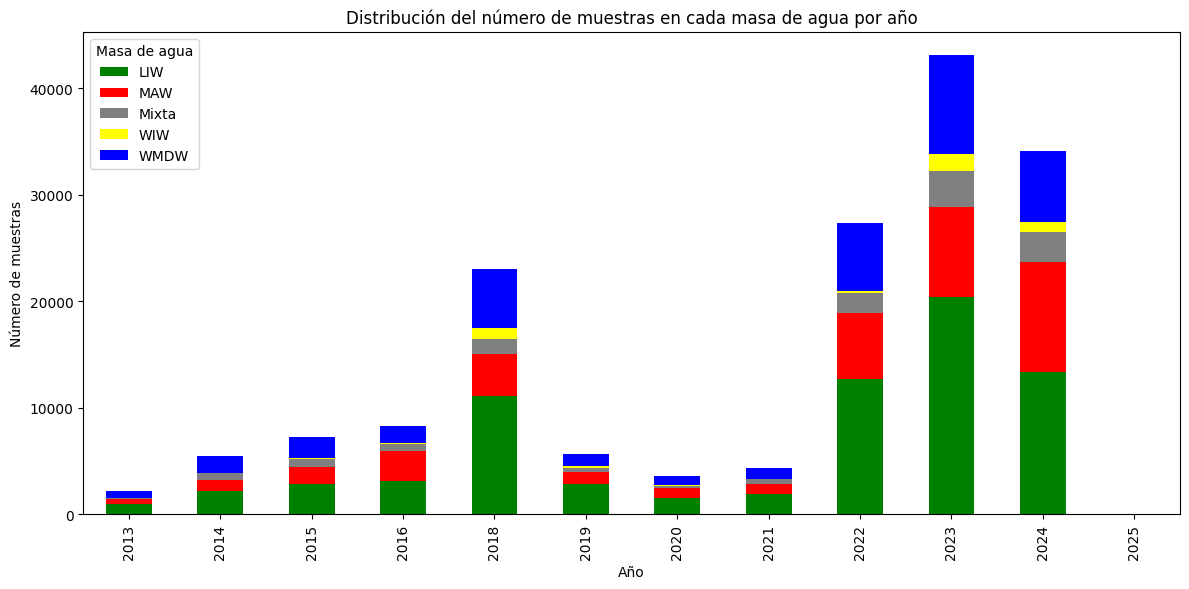

In [6]:
import matplotlib.pyplot as plt

df['YEAR'] = df['DATE_CLEAN'].dt.year

df_counts = df.groupby(['YEAR', 'water_mass']).size().unstack(fill_value=0)
df_counts['TOTAL'] = df_counts.sum(axis=1)

colors_map = {
    'Mixta': 'gray',
    'MAW': 'red',
    'LIW': 'green',
    'WMDW': 'blue',
    'WIW': 'yellow'
}

categorias = ['LIW', 'MAW', 'Mixta', 'WIW', 'WMDW']

df_counts[categorias].plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    color=[colors_map[col] for col in categorias]
)

plt.ylabel('Número de muestras')
plt.xlabel('Año')
plt.title('Distribución del número de muestras en cada masa de agua por año')
plt.legend(title='Masa de agua')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


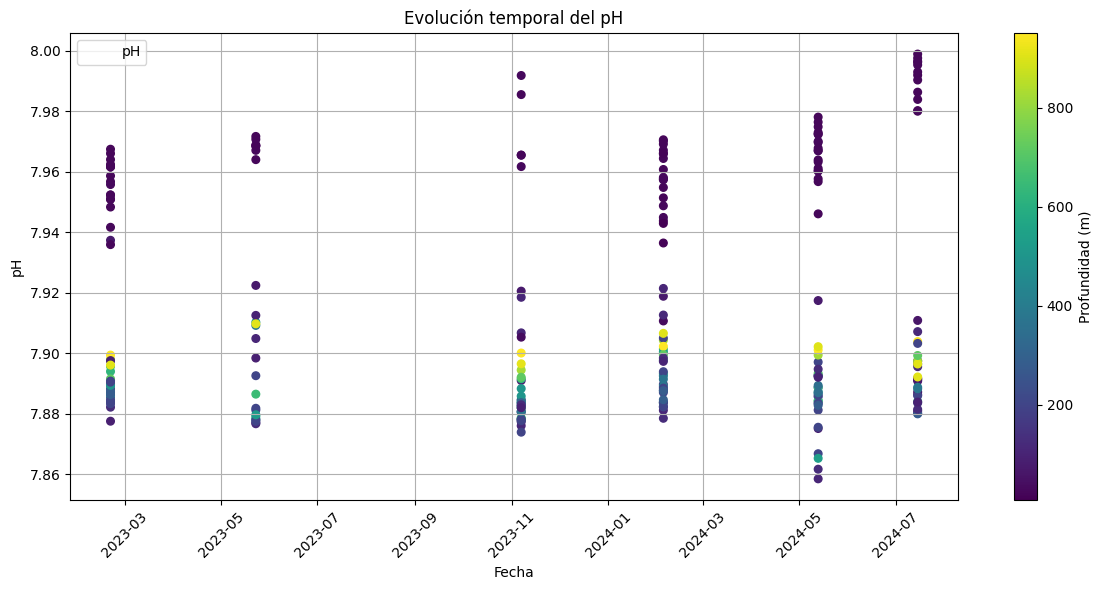

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
fig = plt.scatter(df['DATE_CLEAN'], df['pH'], s=30, label='pH',  c=df['DEPTH'], cmap='viridis')
# Colorbar para profundidad
cbar = plt.colorbar(fig)
cbar.set_label('Profundidad (m)')


plt.title('Evolución temporal del pH')
plt.xlabel('Fecha')
plt.ylabel('pH')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

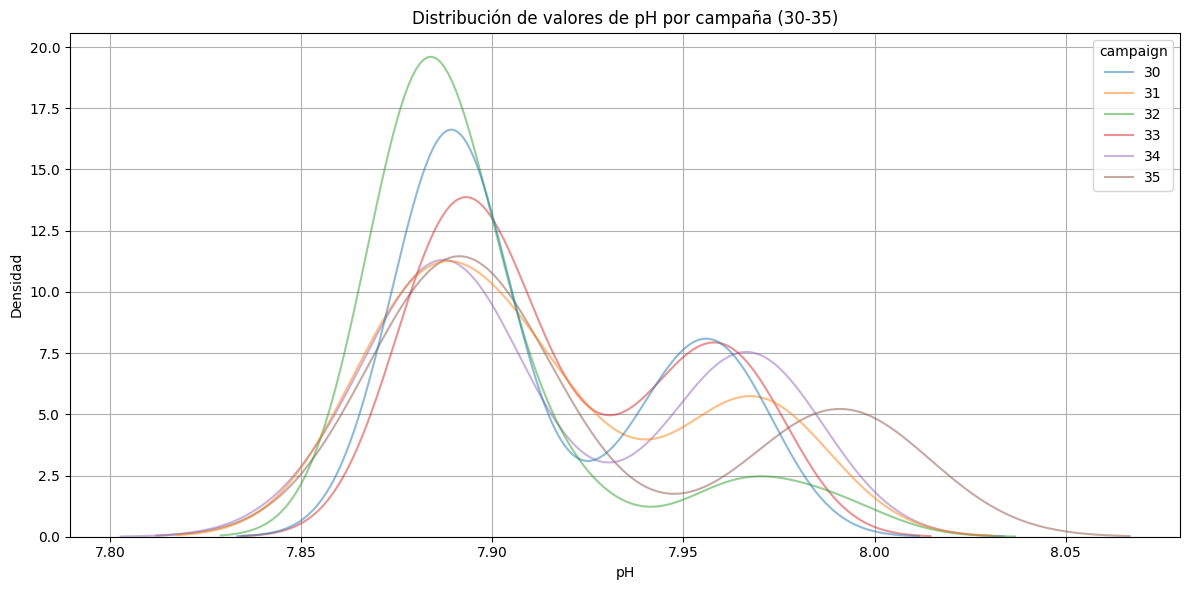

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar campañas 30 a 35
df_subset = df[df['campaign'].between(30, 35)]

plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=df_subset,
    x='pH',
    hue='campaign',
    fill=False,
    common_norm=False,
    alpha=0.5,
    palette='tab10'  # paleta de colores
)

plt.title('Distribución de valores de pH por campaña (30-35)')
plt.xlabel('pH')
plt.ylabel('Densidad')
plt.grid(True)
plt.tight_layout()
plt.show()


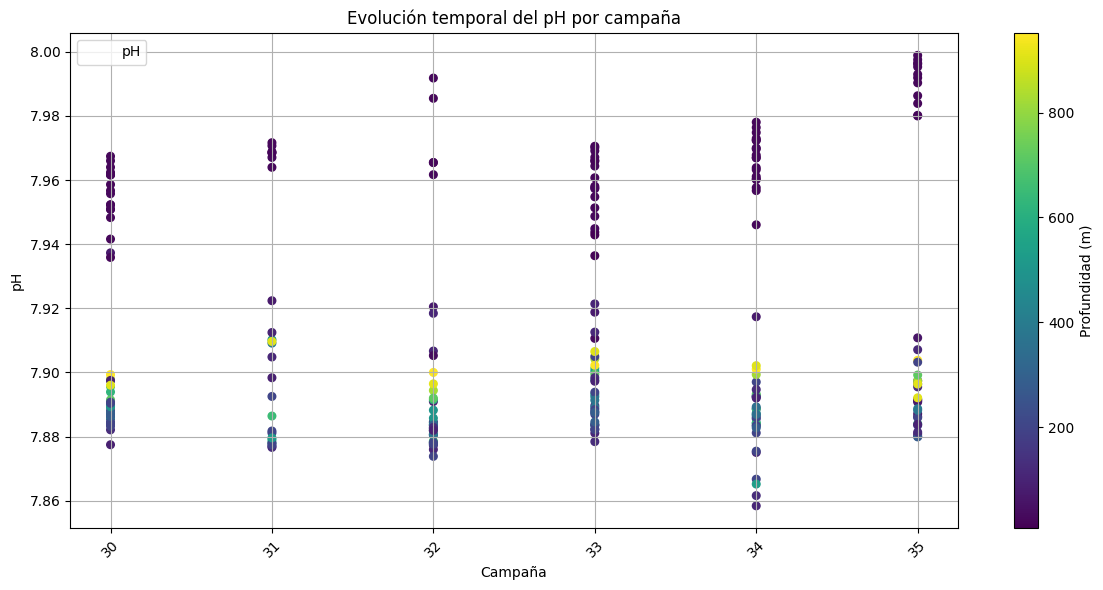

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
fig = plt.scatter(df['campaign'], df['pH'], s=30, label='pH',  c=df['DEPTH'], cmap='viridis')
# Colorbar para profundidad
cbar = plt.colorbar(fig)
cbar.set_label('Profundidad (m)')


plt.title('Evolución temporal del pH por campaña')
plt.xlabel('Campaña')
plt.ylabel('pH')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164637 entries, 0 to 164636
Data columns (total 37 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0.1        164637 non-null  int64         
 1   Unnamed: 0          164637 non-null  int64         
 2   LAT                 164637 non-null  float64       
 3   LON                 164637 non-null  float64       
 4   DEPTH               164637 non-null  float64       
 5   WTR_PRE             164637 non-null  float64       
 6   WTR_TEM_01          164637 non-null  float64       
 7   CHLO                164637 non-null  float64       
 8   TURB                164637 non-null  float64       
 9   OXI_CON             164637 non-null  float64       
 10  DATE                164637 non-null  object        
 11  COND                164637 non-null  float64       
 12  SALT                164637 non-null  float64       
 13  pH                  255 non-n

In [11]:
# Tabla resumen clasificación masas de agua en datos con pH
import pandas as pd

df_ph = df[df['pH'].notna()].copy()

tabla_resumen = df_ph.groupby('campaign').agg(
    Datos_con_pH=('pH', 'count'),
    MAW=('water_mass', lambda x: (x == 'MAW').sum()),
    WIW=('water_mass', lambda x: (x == 'WIW').sum()),
    LIW=('water_mass', lambda x: (x == 'LIW').sum()),
    WMDW=('water_mass', lambda x: (x == 'WMDW').sum())
).reset_index()


fila_total = pd.DataFrame(tabla_resumen[['Datos_con_pH', 'MAW', 'WIW', 'LIW', 'WMDW']].sum()).T
fila_total.insert(0, 'campaign', 'Total')


tabla_resumen = pd.concat([tabla_resumen, fila_total], ignore_index=True)
print(tabla_resumen)


  campaign  Datos_con_pH  MAW  WIW  LIW  WMDW
0       30            51   19    0   19     9
1       31            25    9    2    9     4
2       32            40   12    2   14     8
3       33            50   22    0   18     7
4       34            50   24    2   16     7
5       35            39   24    1    6     6
6    Total           255  110    7   82    41


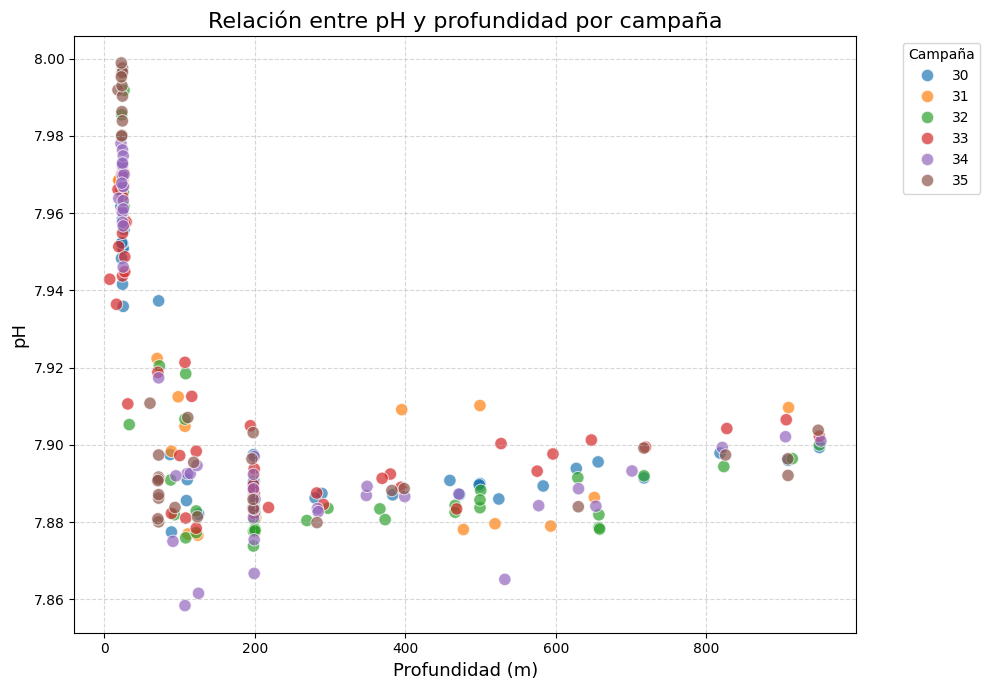

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_ph = df[df['pH'].notna() & df['DEPTH'].notna()].copy()

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_ph,
    x='DEPTH',
    y='pH',
    hue='campaign',          # color por campaña
    palette='tab10',
    s=80,
    alpha=0.7
)


plt.title('Relación entre pH y profundidad por campaña', fontsize=16)
plt.xlabel('Profundidad (m)', fontsize=13)
plt.ylabel('pH', fontsize=13)
plt.legend(title='Campaña', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# Comparación de métodos de aprendizaje máquina con validacion cruzada

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, ElasticNet, RANSACRegressor, HuberRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.utils import shuffle
from scipy.stats import uniform, randint


# Calculo de sin_doy y cos_doy
df['sin_doy'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['cos_doy'] = np.cos(2 * np.pi * df['day_of_year'] / 365)


# Features para prediccion
features= ['SALT', 'DEPTH', 'WTR_TEM_01', 'CHLO', 'OXI_CON','LAT', 'LON',
    'year_decimal','sin_doy', 'cos_doy']


df_known = df[df['pH'].notna()].copy()

X = df_known[features]
y = df_known['pH']
groups = df_known['campaign']  # División por campañas


# # Parámetros para la búsqueda
inner_cv = GroupKFold(n_splits=6)
param_grid = {
    "Ridge": {
        "model": make_pipeline(StandardScaler(), Ridge()),
        "params": {"ridge__alpha": uniform(0.1, 10)}
    },

    "ElasticNet": {
        "model": make_pipeline(StandardScaler(), ElasticNet(max_iter=5000)),
        "params": {
            "elasticnet__alpha": uniform(0.01, 1),
            "elasticnet__l1_ratio": uniform(0, 1)
        }
    },
    "Linear Regression": {
        "model": make_pipeline(StandardScaler(), LinearRegression()),
        "params": {
            "linearregression__fit_intercept": [True, False]
        }
    },
    "KNN": {
        "model": make_pipeline(StandardScaler(), KNeighborsRegressor()),
        "params": {"kneighborsregressor__n_neighbors": randint(3, 15)}
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "max_depth": randint(3, 10),
            "min_samples_split": randint(2, 10),
            "min_samples_leaf": randint(1, 10),
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": randint(100, 300),
            "max_depth": randint(3, 8),
            "max_features": ['sqrt', 'log2', None]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42, loss='huber'),
        "params": {
            "n_estimators": randint(100, 300),
            "learning_rate": uniform(0.01, 0.3),
            "max_depth": randint(3, 8),
            "min_samples_split": randint(2, 10),
            "min_samples_leaf": randint(1, 10),
            "subsample": uniform(0.6, 0.4),
            "max_features": ['sqrt', 'log2', None]
        }
    },
    "AdaBoost": {
        "model": AdaBoostRegressor(random_state=42),
        "params": {
            "n_estimators": randint(50, 300),
            "learning_rate": uniform(0.01, 1)
        }
    },
    "XGBoost": {
        "model": XGBRegressor(objective='reg:squarederror', random_state=42),
        "params": {
            "n_estimators": randint(50, 300),
            "max_depth": randint(3, 8),
            "learning_rate": uniform(0.01, 0.3),
            "subsample": uniform(0.6, 0.4),
            "colsample_bytree": uniform(0.6, 0.4)
        }
    }

}

best_models = {}

for name, mp in param_grid.items():
    print(f"\nOptimizing {name}...")
    rs = RandomizedSearchCV(
        estimator=mp["model"],
        param_distributions=mp["params"],
        n_iter=20,
        cv=inner_cv,
        scoring='neg_root_mean_squared_error',
        verbose=1,
        n_jobs=-1,
        random_state=42
    )
    rs.fit(X, y, groups=groups)
    best_models[name] = rs.best_estimator_
    print(f"Best params for {name}: {rs.best_params_}")


Optimizing Ridge...
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Best params for Ridge: {'ridge__alpha': np.float64(7.180725777960454)}

Optimizing ElasticNet...
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Best params for ElasticNet: {'elasticnet__alpha': np.float64(0.16601864044243653), 'elasticnet__l1_ratio': np.float64(0.15599452033620265)}

Optimizing Linear Regression...
Fitting 6 folds for each of 2 candidates, totalling 12 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for Linear Regression: {'linearregression__fit_intercept': True}

Optimizing KNN...
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Best params for KNN: {'kneighborsregressor__n_neighbors': 10}

Optimizing Decision Tree...
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Best params for Decision Tree: {'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 5}

Optimizing Random Forest...
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Best params for Random Forest: {'max_depth': 4, 'max_features': None, 'n_estimators': 174}

Optimizing Gradient Boosting...
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Best params for Gradient Boosting: {'learning_rate': np.float64(0.12236203565420874), 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 120, 'subsample': np.float64(0.6624074561769746)}

Optimizing AdaBoost...
Fitting 6 folds for each of 20 candidates, totalling 120

In [14]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import clone
import numpy as np
import pandas as pd

# Validación cruzada con Leave One-group-Out
logo = LeaveOneGroupOut()

resultados = []

for nombre, modelo in best_models.items():
    rmses = []
    r2s = []

    for train_idx, test_idx in logo.split(X, y, groups=groups):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Clonar modelo
        m = clone(modelo)
        m.fit(X_train, y_train)
        y_pred = m.predict(X_test)

        rmses.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        r2s.append(r2_score(y_test, y_pred))

    resultados.append({
        "Modelo": nombre,
        "RMSE medio": np.mean(rmses),
        "RMSE std": np.std(rmses),
        "R² medio": np.mean(r2s),
        "R² std": np.std(r2s)
    })

# Mostrar resultados ordenados por RMSE medio
resultados_df = pd.DataFrame(resultados).sort_values(by="RMSE medio")
print(resultados_df.to_string(index=False, float_format="%.5f"))


           Modelo  RMSE medio  RMSE std  R² medio  R² std
Gradient Boosting     0.00905   0.00182   0.93770 0.01231
    Random Forest     0.00985   0.00190   0.92561 0.01638
         AdaBoost     0.01013   0.00223   0.91775 0.03354
          XGBoost     0.01029   0.00239   0.91890 0.02130
    Decision Tree     0.01096   0.00342   0.90438 0.04405
            Ridge     0.01103   0.00147   0.90186 0.03535
Linear Regression     0.01128   0.00181   0.89769 0.03669
              KNN     0.01318   0.00217   0.86269 0.04584
       ElasticNet     0.03282   0.00563   0.18220 0.11689


# Gradient Boosting con optimizacion de hiperparametros

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Preparación datos
features= ['SALT', 'DEPTH', 'WTR_TEM_01', 'CHLO', 'OXI_CON','LAT', 'LON',
    'year_decimal','sin_doy', 'cos_doy']
df_known = df[df['pH'].notna()].copy()
df_unknown = df[df['pH'].isna()].copy()

# Excluir filas con pH del conjunto de predicción
campaigns_con_ph = df_known['campaign'].unique()
df_pred_candidatos = df[df['pH'].isna()].copy()

In [ ]:
# Paleta de colores
colors = {
    "real": "#1f77b4",        # azul
    "predicho": "#ff7f0e",    # naranja
    "diagonal": "#2ca02c",    # verde
    "error_hist": "#d62728",  # rojo
    "scatter": "#1f77b4",     # azul para puntos
    "train_rmse": "#1f77b4",  # azul para train
    "test_rmse": "#ff7f0e"    # naranja para test
}

# Estilo global
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "legend.fontsize": 10,
    "axes.edgecolor": "0.2",
    "axes.linewidth": 1.0
})

In [ ]:
from sklearn.model_selection import LeaveOneGroupOut, GroupKFold, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.base import clone
from scipy.stats import randint, uniform
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================
# PREPARACIÓN DE DATOS
# ==============================================================
X_all = df_known[features]
y_all = df_known['pH']
groups_all = df_known['campaign']
outer_logo = LeaveOneGroupOut()

colors = {
    "real": "#1f77b4", "predicho": "#ff7f0e", "diagonal": "#2ca02c",
    "error_hist": "#d62728", "scatter": "#1f77b4",
    "train_rmse": "#1f77b4", "test_rmse": "#ff7f0e"
}

# ==============================================================
# DISTRIBUCIONES PARA RANDOM SEARCH (inner CV)
# ==============================================================
param_distributions = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(5, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

random_search_base_kwargs = dict(
    estimator=GradientBoostingRegressor(random_state=42, loss='huber'),
    param_distributions=param_distributions,
    n_iter=10,
    scoring='neg_root_mean_squared_error',
    verbose=0,
    random_state=42,
    n_jobs=-1,
    refit=True
)

# ==============================================================
# ALMACENAR RESULTADOS
# ==============================================================
results = {
    "Campaña": [],
    "RMSE_GBM": [], "R2_GBM": [],
    "RMSE_RFRES": [], "R2_RFRES": [],
    "RMSE_LINRES": [], "R2_LINRES": [],
    "RMSE_GBRES":[], "R2_GBRES": [],
    "Num_muestras": []
}

all_true = []
all_preds = {"gbm": [], "rfres": [], "linres": [], "gbres": []}
best_params_list = []

# ==============================================================
# VALIDACIÓN (Leave-One-Group-Out)
# ==============================================================
for i, (train_idx, test_idx) in enumerate(outer_logo.split(X_all, y_all, groups_all), 1):
    X_train, X_test = X_all.iloc[train_idx], X_all.iloc[test_idx]
    y_train, y_test = y_all.iloc[train_idx], y_all.iloc[test_idx]
    groups_train = groups_all.iloc[train_idx]
    campaign_name = groups_all.iloc[test_idx].unique()[0]

    #  INNER CV (busqueda de hiperparametros)
    n_groups_train = groups_train.nunique()
    if n_groups_train >= 2:
        inner_cv = GroupKFold(n_splits=n_groups_train)
        rs = RandomizedSearchCV(cv=inner_cv, **random_search_base_kwargs)
        rs.fit(X_train, y_train, groups=groups_train)
        best_gb = rs.best_estimator_
        best_params_list.append(rs.best_params_)
    else:
        best_gb = GradientBoostingRegressor(random_state=42, loss='huber')
        best_params_list.append(None)
        best_gb.fit(X_train, y_train)

    #  GBM base
    gbm_model = clone(best_gb)
    gbm_model.fit(X_train, y_train)
    y_pred_gbm = gbm_model.predict(X_test)
    rmse_gbm = np.sqrt(mean_squared_error(y_test, y_pred_gbm))
    r2_gbm = r2_score(y_test, y_pred_gbm)


# ======================================================
# CÁLCULO DE TRAIN Y VALIDATION LOSS POR ÉPOCA
# =====================================================

    n_estimators = gbm_model.n_estimators_
    train_loss = np.zeros(n_estimators)
    val_loss = np.zeros(n_estimators)

    for i, y_pred_stage in enumerate(gbm_model.staged_predict(X_train)):
      train_loss[i] = mean_squared_error(y_train, y_pred_stage)
    for i, y_pred_stage in enumerate(gbm_model.staged_predict(X_test)):
      val_loss[i] = mean_squared_error(y_test, y_pred_stage)

# Grafica loss por campaña
    plt.figure(figsize=(8,5))
    plt.plot(np.arange(1, n_estimators+1), np.sqrt(train_loss), label='Train', color=colors["train_rmse"])
    plt.plot(np.arange(1, n_estimators+1), np.sqrt(val_loss), label='Validation', color=colors["test_rmse"])
    plt.xlabel('Número de estimadores')
    plt.ylabel('RMSE')
    plt.ylim(0,0.050)
    plt.title(f'Campaña {campaign_name}: Evolución de la función de pérdida GBM base')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Residuos
    residuals_train = y_train - gbm_model.predict(X_train)

    # Random Forest sobre residuos
    rf_resid_model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
    rf_resid_model.fit(X_train, residuals_train)
    y_pred_rfres = y_pred_gbm + rf_resid_model.predict(X_test)
    rmse_rfres = np.sqrt(mean_squared_error(y_test, y_pred_rfres))
    r2_rfres = r2_score(y_test, y_pred_rfres)

    # Linear Regression sobre residuos
    lin_resid_model = LinearRegression()
    lin_resid_model.fit(X_train, residuals_train)
    y_pred_linres = y_pred_gbm + lin_resid_model.predict(X_test)
    rmse_linres = np.sqrt(mean_squared_error(y_test, y_pred_linres))
    r2_linres = r2_score(y_test, y_pred_linres)

    # Gradient Boosting sobre residuos
    gb_resid_model = GradientBoostingRegressor(n_estimators=50, max_depth=5, random_state=42)
    gb_resid_model.fit(X_train, residuals_train)
    y_pred_gbres = y_pred_gbm + gb_resid_model.predict(X_test)
    rmse_gbres = np.sqrt(mean_squared_error(y_test, y_pred_gbres))
    r2_gbres = r2_score(y_test, y_pred_gbres)

    # Resultados
    results["Campaña"].append(campaign_name)
    results["RMSE_GBM"].append(rmse_gbm)
    results["R2_GBM"].append(r2_gbm)
    results["RMSE_RFRES"].append(rmse_rfres)
    results["R2_RFRES"].append(r2_rfres)
    results["RMSE_LINRES"].append(rmse_linres)
    results["R2_LINRES"].append(r2_linres)
    results["RMSE_GBRES"].append(rmse_gbres)
    results["R2_GBRES"].append(r2_gbres)
    results["Num_muestras"].append(len(y_test))


    all_true.extend(y_test)
    all_preds["gbm"].extend(y_pred_gbm)
    all_preds["rfres"].extend(y_pred_rfres)
    all_preds["linres"].extend(y_pred_linres)
    all_preds["gbres"].extend(y_pred_gbres)

    #  Gráficos por campaña
    for pred, label in zip([y_pred_rfres, y_pred_linres], ["Residuos RF", "Residuos LR"]):
        # Scatter por campaña
        plt.figure(figsize=(6,5))
        plt.scatter(y_test, pred, alpha=0.8, color=colors["scatter"], edgecolor='white', s=60)
        #plt.scatter(y_test, y_pred_gbm, alpha=0.8, color=colors["scatter"], edgecolor='white', s=60, label = 'GB base')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color=colors["diagonal"], lw=1.5)
        plt.xlabel('pH real'); plt.ylabel(f'pH predicho')
        rmse_val = np.sqrt(mean_squared_error(y_test, pred))
        r2_val = r2_score(y_test, pred)
        plt.xlim(7.85,8)
        plt.ylim(7.85,8)
        plt.title(f'Campaña {campaign_name}. RMSE: {rmse_val:.3f}, R²: {r2_val:.3f}. {label}')
        plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

        # Histograma de errores por campaña
        errors = y_test - pred
        plt.figure(figsize=(8,5))
        sns.histplot(errors, bins=20, kde=True, color=colors["error_hist"])
        plt.axvline(0, color='black', linestyle='--')
        plt.xlabel('Error (real - predicho)'); plt.ylabel('Frecuencia')
        plt.title(f'Distribución de errores en campaña {campaign_name} ({label})')
        plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

        # Línea Real vs Predicho por campaña
        plt.figure(figsize=(10,5))
        plt.plot(y_test.values, label='Real', color=colors["real"], marker='o')
        plt.plot(pred, label=f'Predicho ({label})', color=colors["predicho"], marker='x')
        plt.xlabel('Número de muestra'); plt.ylabel('pH')
        plt.ylim(7.85,8)
        plt.title(f'Campaña {campaign_name}: Comparación pH real vs predicho ({label})')
        plt.legend(); plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ==============================================================
# TABLA RESUMEN POR CAMPAÑA
# ==============================================================

df_results = pd.DataFrame(results)
print("\n==================== MÉTRICAS POR CAMPAÑA ====================")
print(df_results)
print("==============================================================")

# Modelos a evaluar
models = [("gbm","GB base"), ("rfres","GB + RF-res"), ("linres","GB + LR-res"), ("gbres", "GB + GB-res")]

# Pesos por número de muestras
weights = df_results["Num_muestras"].values / df_results["Num_muestras"].sum()

metrics_summary = []

for model_key, label in models:
    # RMSE y R² por campaña
    rmse_vals = df_results[f"RMSE_{model_key.upper()}"].values
    r2_vals = df_results[f"R2_{model_key.upper()}"].values

    # Media y std por campaña
    rmse_mean = rmse_vals.mean()
    rmse_std = rmse_vals.std()
    r2_mean = r2_vals.mean()
    r2_std = r2_vals.std()

    # Ponderado: media y std
    rmse_weighted = np.sum(weights * rmse_vals)
    r2_weighted = np.sum(weights * r2_vals)
    rmse_weighted_std = np.sqrt(np.sum((weights**2) * (rmse_vals - rmse_mean)**2))
    r2_weighted_std = np.sqrt(np.sum((weights**2) * (r2_vals - r2_mean)**2))

    # Global: sobre todas las predicciones
    y_true_arr = np.array(all_true)
    y_pred_arr = np.array(all_preds[model_key])
    rmse_global = np.sqrt(mean_squared_error(y_true_arr, y_pred_arr))
    r2_global = r2_score(y_true_arr, y_pred_arr)
    errors = y_true_arr - y_pred_arr
    rmse_global_std = np.std(errors)
    r2_global_std = np.std(r2_vals)

    metrics_summary.append({
        "Modelo": label,
        "RMSE_mean": rmse_mean,
        "RMSE_std": rmse_std,
        "R2_mean": r2_mean,
        "R2_std": r2_std,
        "RMSE_weighted": rmse_weighted,
        "RMSE_weighted_std": rmse_weighted_std,
        "R2_weighted": r2_weighted,
        "R2_weighted_std": r2_weighted_std,
        "RMSE_global": rmse_global,
        "RMSE_global_std": rmse_global_std,
        "R2_global": r2_global,
        "R2_global_std": r2_global_std
    })

df_metrics = pd.DataFrame(metrics_summary)

print("\n==================== RESUMEN COMPLETO DE MÉTRICAS ====================")
print(df_metrics)



==================== MÉTRICAS POR CAMPAÑA ====================
   Campaña  RMSE_GBM    R2_GBM  RMSE_RFRES  R2_RFRES  RMSE_LINRES  R2_LINRES  \
0       30  0.007011  0.952018    0.007034  0.951704     0.006871   0.953919   
1       31  0.010918  0.911583    0.010620  0.916338     0.010784   0.913740   
2       32  0.008173  0.930266    0.008349  0.927236     0.008839   0.918435   
3       33  0.009265  0.915126    0.009330  0.913927     0.009310   0.914313   
4       34  0.009752  0.941228    0.009998  0.938225     0.009860   0.939920   
5       35  0.010960  0.944308    0.009544  0.957774     0.010386   0.949989   

   RMSE_GBRES  R2_GBRES  Num_muestras  
0    0.007090  0.950928            51  
1    0.010659  0.915720            25  
2    0.008465  0.925198            40  
3    0.009417  0.912327            50  
4    0.009986  0.938375            50  
5    0.011109  0.942786            39  

==================== RESUMEN COMPLETO DE MÉTRICAS ====================
        Modelo  RMSE_me


==================== MÉTRICAS POR CAMPAÑA ====================
   Campaña  RMSE_GBM    R2_GBM  RMSE_RFRES  R2_RFRES  RMSE_LINRES  R2_LINRES  \
0       30  0.007011  0.952018    0.007034  0.951704     0.006871   0.953919   
1       31  0.010918  0.911583    0.010620  0.916338     0.010784   0.913740   
2       32  0.008173  0.930266    0.008349  0.927236     0.008839   0.918435   
3       33  0.009265  0.915126    0.009330  0.913927     0.009310   0.914313   
4       34  0.009752  0.941228    0.009998  0.938225     0.009860   0.939920   
5       35  0.010960  0.944308    0.009544  0.957774     0.010386   0.949989   

   RMSE_GBRES  R2_GBRES  Num_muestras  
0    0.007090  0.950928            51  
1    0.010659  0.915720            25  
2    0.008465  0.925198            40  
3    0.009417  0.912327            50  
4    0.009986  0.938375            50  
5    0.011109  0.942786            39  
GB base             .  RMSE global: 0.0093 | R² global: 0.9382
GB + RF-res         .  RMSE glob

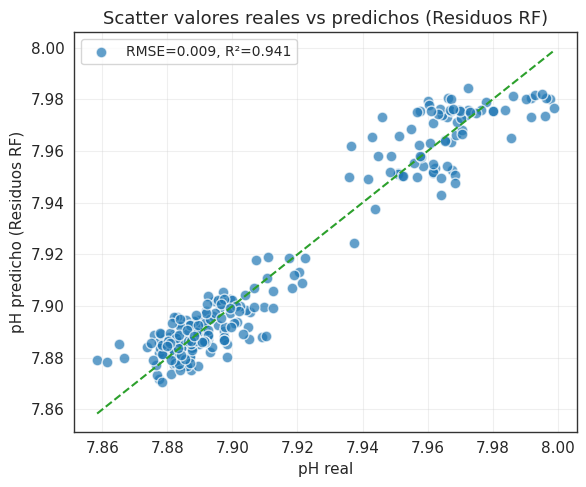

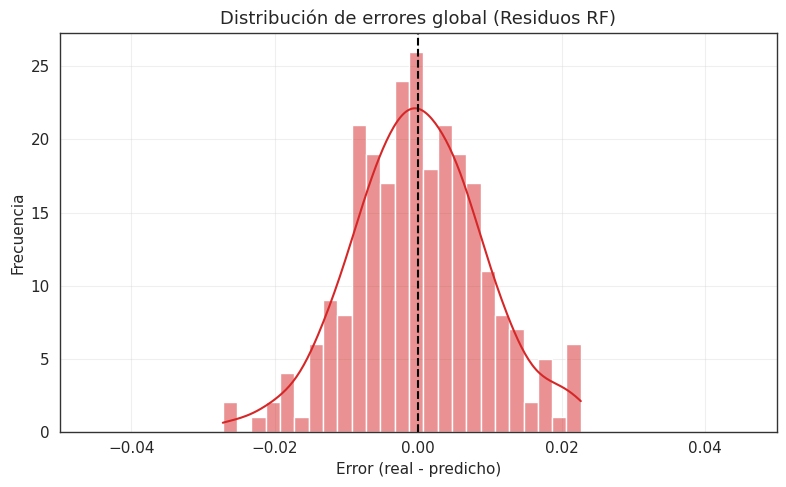

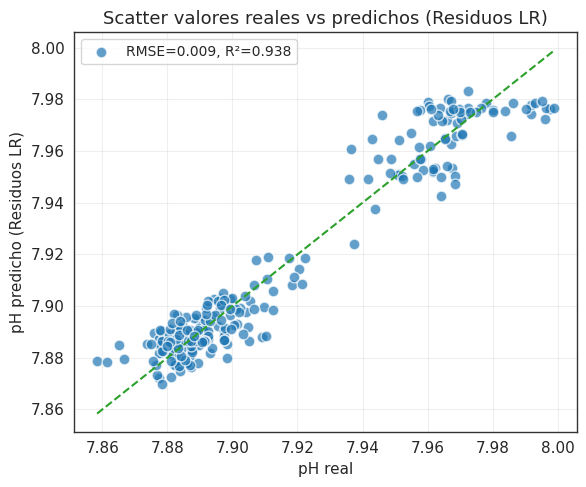

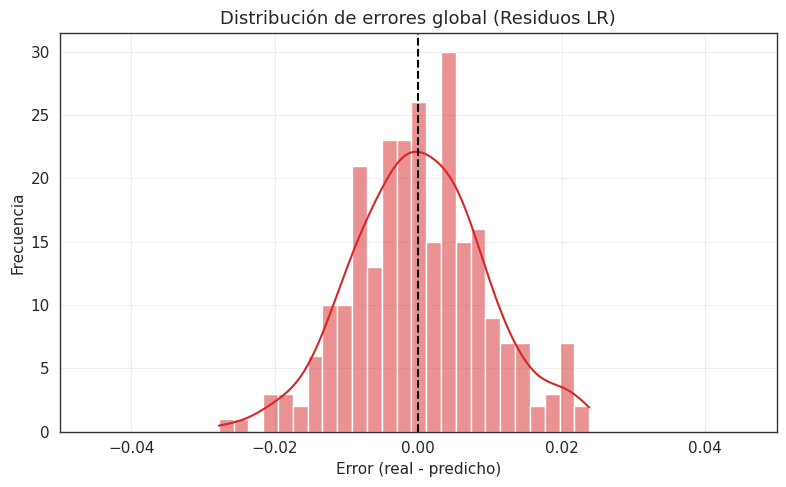

In [ ]:
# ==============================================================
# TABLA RESUMEN POR CAMPAÑA CON STD
# ==============================================================
df_results = pd.DataFrame(results)
print("\n==================== MÉTRICAS POR CAMPAÑA ====================")
print(df_results)
print("==============================================================")

# ==============================================================
# MÉTRICAS GLOBALES  (todas las predicciones juntas)
# ==============================================================
models = [("gbm","GB base"), ("rfres","GB + RF-res"), ("linres","GB + LR-res"), ("gbres", "GB + GB-res")]
for model_key, label in models:
    rmse_global = np.sqrt(mean_squared_error(all_true, all_preds[model_key]))
    r2_global = r2_score(all_true, all_preds[model_key])
    print(f"{label:<20}.  RMSE global: {rmse_global:.4f} | R² global: {r2_global:.4f}")

# ==============================================================
# MÉTRICAS MEDIAS POR CAMPAÑA CON STD
# ==============================================================
metrics_summary = []
weights = df_results["Num_muestras"].values / df_results["Num_muestras"].sum()

for model_key, label in models:
    rmse_vals = df_results[f"RMSE_{model_key.upper()}"].values
    r2_vals = df_results[f"R2_{model_key.upper()}"].values

    rmse_mean = rmse_vals.mean()
    rmse_std = rmse_vals.std()
    r2_mean = r2_vals.mean()
    r2_std = r2_vals.std()

    # Ponderado
    rmse_weighted = np.sum(weights * rmse_vals)
    r2_weighted = np.sum(weights * r2_vals)

    metrics_summary.append({
        "Modelo": label,
        "RMSE_mean": rmse_mean,
        "RMSE_std": rmse_std,
        "R2_mean": r2_mean,
        "R2_std": r2_std,
        "RMSE_weighted": rmse_weighted,
        "R2_weighted": r2_weighted,
        "RMSE_global": np.sqrt(mean_squared_error(all_true, all_preds[model_key])),
        "R2_global": r2_score(all_true, all_preds[model_key])
    })

df_metrics = pd.DataFrame(metrics_summary)
print("\n==================== RESUMEN MÉTRICAS CON STD ====================")
print(df_metrics)

# ==============================================================
#  SCATTER GLOBAL PARA RF-RESIDUAL Y LR-RESIDUAL
# ==============================================================
for model_key, label in [("rfres","Residuos RF"), ("linres","Residuos LR")]:
    rmse_global = np.sqrt(mean_squared_error(all_true, all_preds[model_key]))
    r2_global = r2_score(all_true, all_preds[model_key])
    plt.figure(figsize=(6,5))
    plt.scatter(all_true, all_preds[model_key], alpha=0.7, color=colors["scatter"], edgecolor='white', s=60,
                label=f"RMSE={rmse_global:.3f}, R²={r2_global:.3f}")
    plt.plot([min(all_true), max(all_true)], [min(all_true), max(all_true)], '--', color=colors["diagonal"], lw=1.5)
    plt.xlabel('pH real'); plt.ylabel(f'pH predicho ({label})')
    plt.title(f'Scatter valores reales vs predichos ({label})')
    plt.legend(); plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

    errors = np.array(all_true) - np.array(all_preds[model_key])
    plt.figure(figsize=(8,5))
    sns.histplot(errors, bins=25, kde=True, color=colors["error_hist"])
    plt.axvline(0, color='black', linestyle='--')
    plt.xlabel('Error (real - predicho)'); plt.ylabel('Frecuencia')
    plt.xlim(-0.05, 0.05)
    plt.title(f'Distribución de errores global ({label})')
    plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

# ==============================================================
# REENTRENAMIENTO FINAL CON LOS MEJORES PARÁMETROS
# ==============================================================
last_non_none = None
for p in reversed(best_params_list):
    if p is not None:
        last_non_none = p
        break

if last_non_none is not None:
    # Reentrenar GB base
    final_gb = GradientBoostingRegressor(**last_non_none, random_state=42, loss='huber')
    final_gb.fit(X_all, y_all)

    # Calcular residuos sobre todo el conjunto
    residuals_all = y_all - final_gb.predict(X_all)

    # Entrenar regresión lineal sobre los residuos
    final_rf_resid = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
    final_rf_resid.fit(X_all, residuals_all)

    def predict_final(X):
        """Predicción combinada: GB base + RF sobre residuos"""
        y_gb = final_gb.predict(X)
        y_final = y_gb + final_rf_resid.predict(X)
        return y_final



In [ ]:
parametros = pd.DataFrame([last_non_none])

print(parametros.to_string(index=False))

 learning_rate  max_depth max_features  min_samples_leaf  min_samples_split  n_estimators  subsample
      0.150029          9         None                 7                  6           122   0.626021


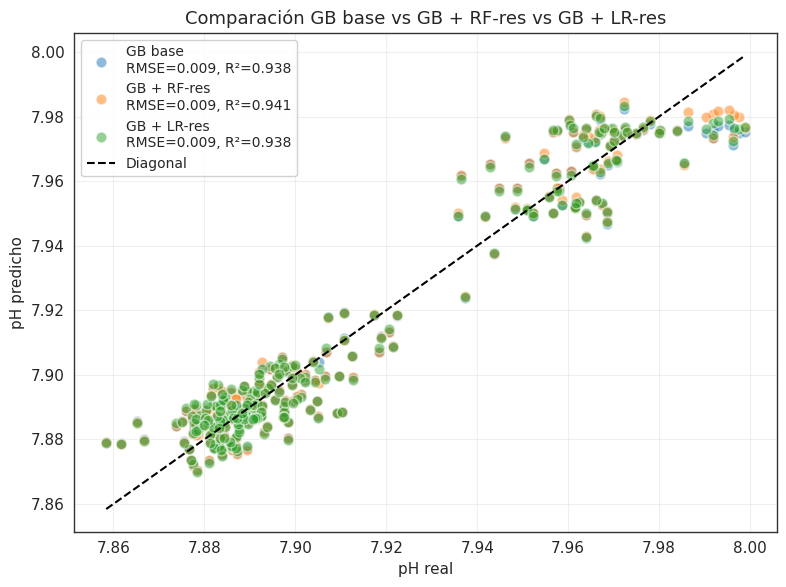

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

y_true = np.array(all_true)
y_pred_gb = np.array(all_preds["gbm"])
y_pred_rfres = np.array(all_preds["rfres"])
y_pred_linres = np.array(all_preds["linres"])

# Calcular métricas
rmse_gb = np.sqrt(mean_squared_error(y_true, y_pred_gb))
r2_gb = r2_score(y_true, y_pred_gb)

rmse_rfres = np.sqrt(mean_squared_error(y_true, y_pred_rfres))
r2_rfres = r2_score(y_true, y_pred_rfres)

rmse_linres = np.sqrt(mean_squared_error(y_true, y_pred_linres))
r2_linres = r2_score(y_true, y_pred_linres)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_true, y_pred_gb, alpha=0.5, color="#1f77b4", edgecolor='white', s=60,
            label=f'GB base\nRMSE={rmse_gb:.3f}, R²={r2_gb:.3f}')
plt.scatter(y_true, y_pred_rfres, alpha=0.5, color="#ff7f0e", edgecolor='white', s=60,
            label=f'GB + RF-res\nRMSE={rmse_rfres:.3f}, R²={r2_rfres:.3f}')
plt.scatter(y_true, y_pred_linres, alpha=0.5, color="#2ca02c", edgecolor='white', s=60,
            label=f'GB + LR-res\nRMSE={rmse_linres:.3f}, R²={r2_linres:.3f}')

plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--', color='black', lw=1.5, label='Diagonal')
plt.xlabel('pH real')
plt.ylabel('pH predicho')
plt.title('Comparación GB base vs GB + RF-res vs GB + LR-res')
plt.legend(loc='upper left', framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


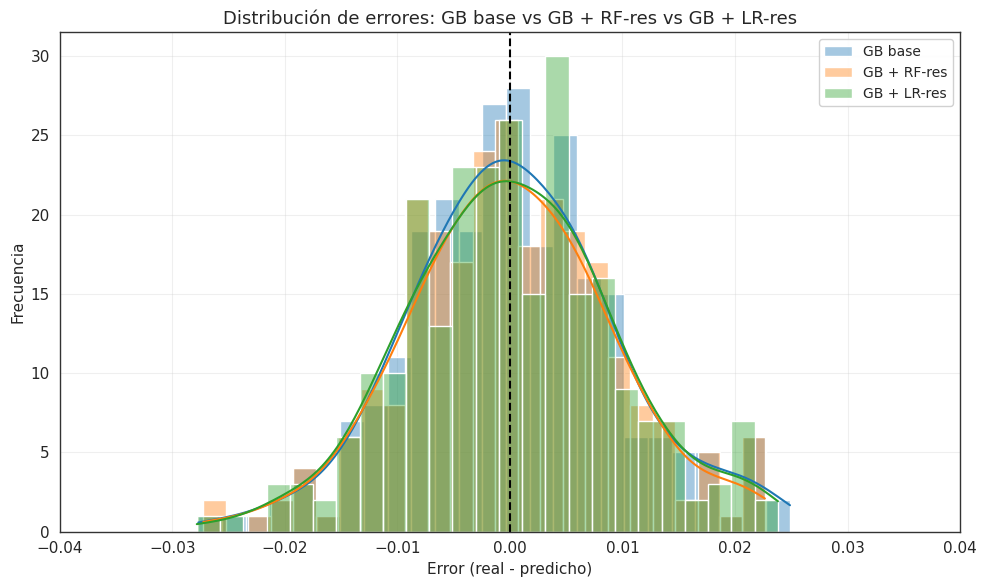

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


y_true = np.array(all_true)
y_pred_gb = np.array(all_preds["gbm"])
y_pred_rfres = np.array(all_preds["rfres"])
y_pred_linres = np.array(all_preds["linres"])

# Calcular errores
errors_gb = y_true - y_pred_gb
errors_rfres = y_true - y_pred_rfres
errors_linres = y_true - y_pred_linres

# Calcular métricas
rmse_gb = np.sqrt(mean_squared_error(y_true, y_pred_gb))
r2_gb = r2_score(y_true, y_pred_gb)

rmse_rfres = np.sqrt(mean_squared_error(y_true, y_pred_rfres))
r2_rfres = r2_score(y_true, y_pred_rfres)

rmse_linres = np.sqrt(mean_squared_error(y_true, y_pred_linres))
r2_linres = r2_score(y_true, y_pred_linres)

# Histograma comparativo errores
plt.figure(figsize=(10,6))
sns.histplot(errors_gb, bins=25, kde=True, color="#1f77b4", label=f'GB base', alpha=0.4)
sns.histplot(errors_rfres, bins=25, kde=True, color="#ff7f0e", label=f'GB + RF-res', alpha=0.4)
sns.histplot(errors_linres, bins=25, kde=True, color="#2ca02c", label=f'GB + LR-res', alpha=0.4)

plt.axvline(0, color='black', linestyle='--', lw=1.5)
plt.xlabel('Error (real - predicho)')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores: GB base vs GB + RF-res vs GB + LR-res')
plt.xlim(-0.04, 0.04)
plt.legend(framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Predicción

In [ ]:
import numpy as np
import pandas as pd

def sample_by_campaign_and_depth(df_candidates, df_train, n_samples_per_campaign=500, n_bins=20, random_state=42):
    np.random.seed(random_state)
    sampled_list = []

    # campañas con datos de pH conocido
    campaigns_con_ph = df_train['campaign'].unique()

    for camp in df_candidates['campaign'].unique():
        df_camp = df_candidates[df_candidates['campaign'] == camp].copy()
        df_train_camp = df_train[df_train['campaign'] == camp]

        # Caso 1: campaña con pH conocido : solo predecir WIW (máx. 8)
        if camp in campaigns_con_ph:
            wiw_candidates = df_camp[df_camp['water_mass'] == 'WIW']
            if not wiw_candidates.empty:
                n_wiw_samples = min(8, len(wiw_candidates))
                sampled = wiw_candidates.sample(n=n_wiw_samples, random_state=random_state)
                sampled_list.append(sampled)
            continue

        # Caso 2: campaña sin pH conocido : muestreo estratificado por profundidad
        if df_train_camp.empty:
            df_train_camp = df_train

        # Bins según la distribución de entrenamiento
        bins = np.linspace(df_train_camp['DEPTH'].min(), df_train_camp['DEPTH'].max(), n_bins+1)
        df_camp['depth_bin'] = np.digitize(df_camp['DEPTH'], bins) - 1

        # Distribución de bins en entrenamiento
        train_counts, _ = np.histogram(df_train_camp['DEPTH'], bins=bins)
        train_prob = train_counts / train_counts.sum()

        sampled_indices = []

        # Asegurar WIW (hasta 8)
        wiw_candidates = df_camp[df_camp['water_mass'] == 'WIW']
        if not wiw_candidates.empty:
            n_wiw_samples = min(8, len(wiw_candidates))
            sampled_indices.extend(np.random.choice(wiw_candidates.index, size=n_wiw_samples, replace=False))

        # Muestreo estratificado por bins
        for b in range(n_bins):
            bin_indices = df_camp[df_camp['depth_bin'] == b].index
            bin_indices = bin_indices.difference(sampled_indices)

            n_bin_samples = int(np.round(train_prob[b] * n_samples_per_campaign))
            if len(bin_indices) > 0 and n_bin_samples > 0:
                sampled_indices.extend(
                    np.random.choice(bin_indices, size=min(n_bin_samples, len(bin_indices)), replace=False)
                )

        sampled_list.append(df_camp.loc[sampled_indices])

    return pd.concat(sampled_list).drop(columns='depth_bin', errors='ignore')




In [ ]:
# Predecir en subconjunto
df_prediccion = sample_by_campaign_and_depth(df_pred_candidatos, df_known, n_samples_per_campaign=50, n_bins=20)

X_pred = df_prediccion[features].dropna()
df_prediccion.loc[X_pred.index, 'pH_predicho'] = predict_final(X_pred)

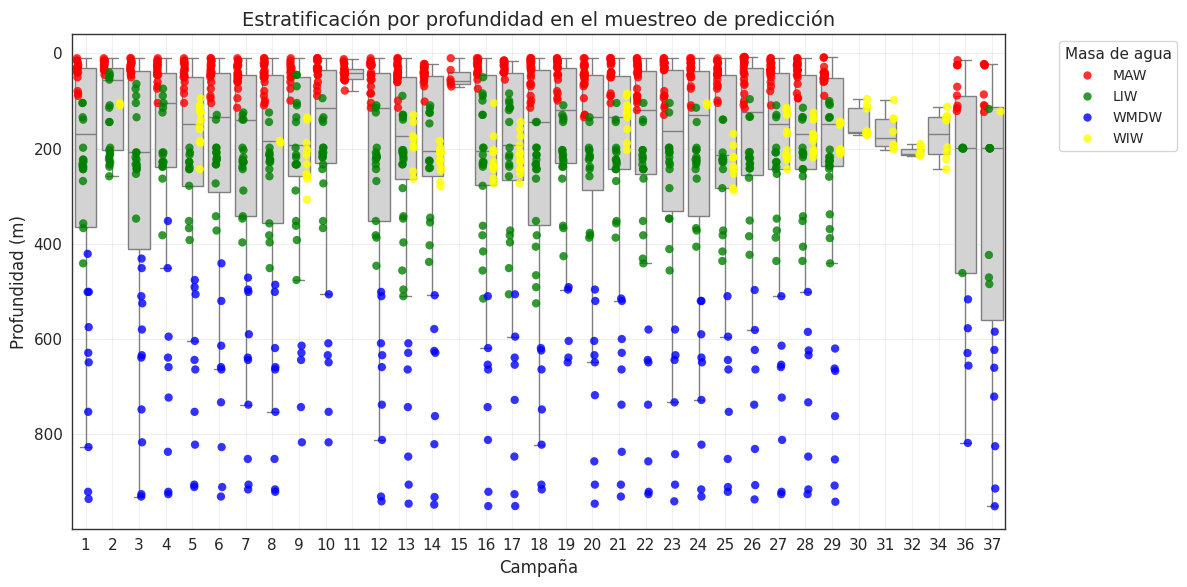

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapa de colores
colors_map = {
    'MAW': 'red',
    'LIW': 'green',
    'WMDW': 'blue',
    'WIW': 'yellow'
}


df_plot = df_prediccion[df_prediccion['water_mass'] != 'Mixta']

plt.figure(figsize=(12, 6))

# Boxplot de la distribución de profundidad por campaña
sns.boxplot(
    data=df_plot,
    x='campaign',
    y='DEPTH',
    color='lightgray',
    showfliers=False
)

sns.stripplot(
    data=df_plot,
    x='campaign',
    y='DEPTH',
    hue='water_mass',
    palette=colors_map,
    size=6,
    jitter=True,
    dodge=True,
    alpha=0.8
)

plt.gca().invert_yaxis()

plt.title('Estratificación por profundidad en el muestreo de predicción', fontsize=14)
plt.xlabel('Campaña', fontsize=12)
plt.ylabel('Profundidad (m)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Masa de agua', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


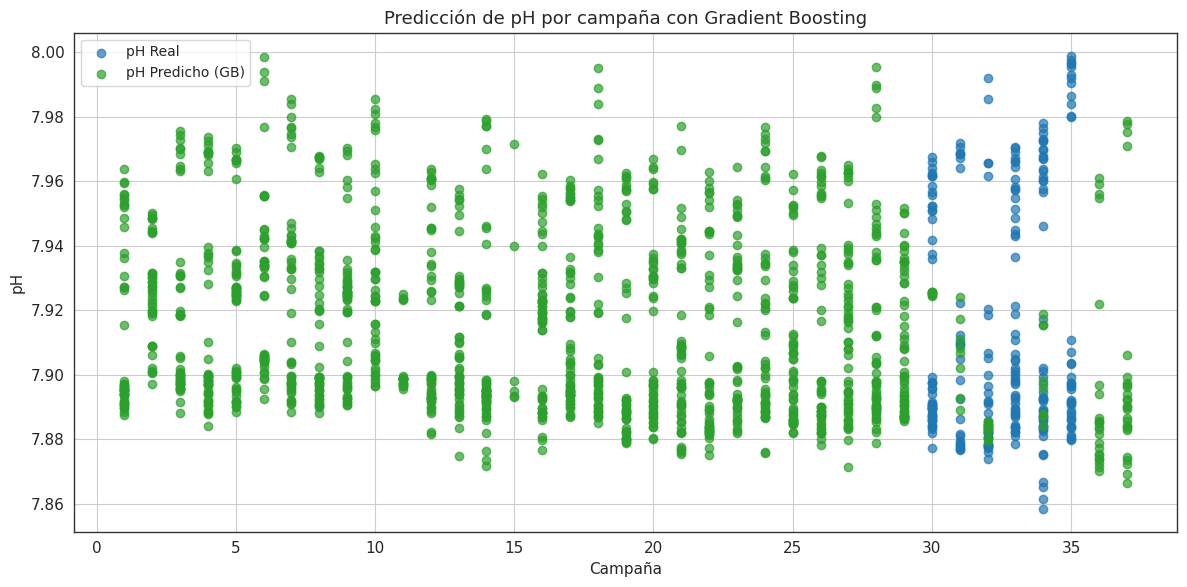

In [ ]:
import matplotlib.pyplot as plt

# Asignar etiquetas y columna de valores combinados
df_known['tipo'] = 'Real'
df_known['pH_mixed'] = df_known['pH']

df_prediccion['tipo'] = 'Predicho'
df_prediccion['pH_mixed'] = df_prediccion['pH_predicho']

# Combinar los datos
features=[
 'LAT',
 'LON',
 'DATE',
 'DEPTH',
 'WTR_PRE',
 'WTR_TEM_01',
 'CHLO',
 'TURB',
 'OXI_CON',
 'DATE',
 'SALT',
 'pH Accuracy',
 'pH Precision',
 'campaign',
 'anomaly_iso',
 'season',
 'cluster_gmm',
 'cluster_gmm_named',
 'cluster_gmm_strict',
 'cluster_num',
 'tipo',
 'year',
 'pH_mixed',
 'DATE_CLEAN',
 'year_decimal',
  'water_mass']
df_grafico = pd.concat([
    df_known[features],
    df_prediccion[features]
]).copy()

df_grafico['campaign'] = pd.to_numeric(df_grafico['campaign'], errors='coerce')

import matplotlib.pyplot as plt
import seaborn as sns

colors = {
    "real": "#1f77b4",        # azul
    "predicho": "#2ca02c",    # verde
    "diagonal": "#d62728",    # rojo
    "error_hist": "#ff7f0e",  # naranja para histograma de errores
    "scatter": "#1f77b4",     # azul para scatter general
    "train_rmse": "#1f77b4",  # azul
    "test_rmse": "#ff7f0e"    # naranja
}

sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "legend.fontsize": 10,
    "axes.edgecolor": "0.2",
    "axes.linewidth": 1.0
})

plt.figure(figsize=(12, 6))

# pH Real
plt.scatter(
    df_grafico[df_grafico['tipo'] == 'Real']['campaign'],
    df_grafico[df_grafico['tipo'] == 'Real']['pH_mixed'],
    color=colors["real"], label='pH Real', alpha=0.7
)

# pH Predicho
plt.scatter(
    df_grafico[df_grafico['tipo'] == 'Predicho']['campaign'],
    df_grafico[df_grafico['tipo'] == 'Predicho']['pH_mixed'],
    color=colors["predicho"], label='pH Predicho (GB)', alpha=0.7
)

plt.xlabel('Campaña')
plt.ylabel('pH')
plt.title('Predicción de pH por campaña con Gradient Boosting')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


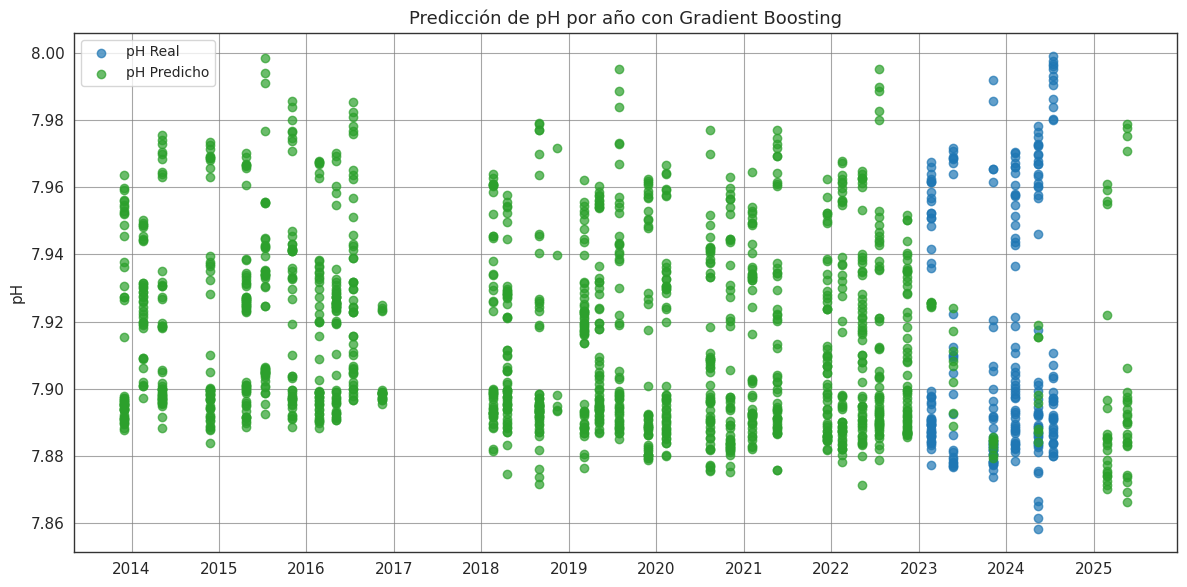

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


colors = {
    "real": "#1f77b4",        # azul
    "predicho": "#2ca02c",    # verde
    "diagonal": "#d62728",    # rojo
    "error_hist": "#ff7f0e",  # naranja para histograma de errores
    "scatter": "#1f77b4",     # azul genérico
    "train_rmse": "#1f77b4",
    "test_rmse": "#ff7f0e"
}

sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "legend.fontsize": 10,
    "axes.edgecolor": "0.2",
    "axes.linewidth": 1.0
})


plt.figure(figsize=(12, 6))
df_grafico['DATE_CLEAN'] = pd.to_datetime(df_grafico['DATE_CLEAN'])

# pH Real
plt.scatter(
    df_grafico[df_grafico['tipo'] == 'Real']['DATE_CLEAN'],
    df_grafico[df_grafico['tipo'] == 'Real']['pH_mixed'],
    color=colors["real"], label='pH Real', alpha=0.7
)

# pH Predicho
plt.scatter(
    df_grafico[df_grafico['tipo'] == 'Predicho']['DATE_CLEAN'],
    df_grafico[df_grafico['tipo'] == 'Predicho']['pH_mixed'],
    color=colors["predicho"], label='pH Predicho', alpha=0.7
)

plt.ylabel('pH')
plt.title('Predicción de pH por año con Gradient Boosting')
plt.legend()

ax = plt.gca()

# Ticks y etiquetas por año
ax.xaxis.set_major_locator(mdates.YearLocator())  # cada año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # mostrar solo el año

ax.grid(True, linestyle='-', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
df_grafico.to_csv('gradientboosting_16_11.csv', index=False)

## Interpretabilidad

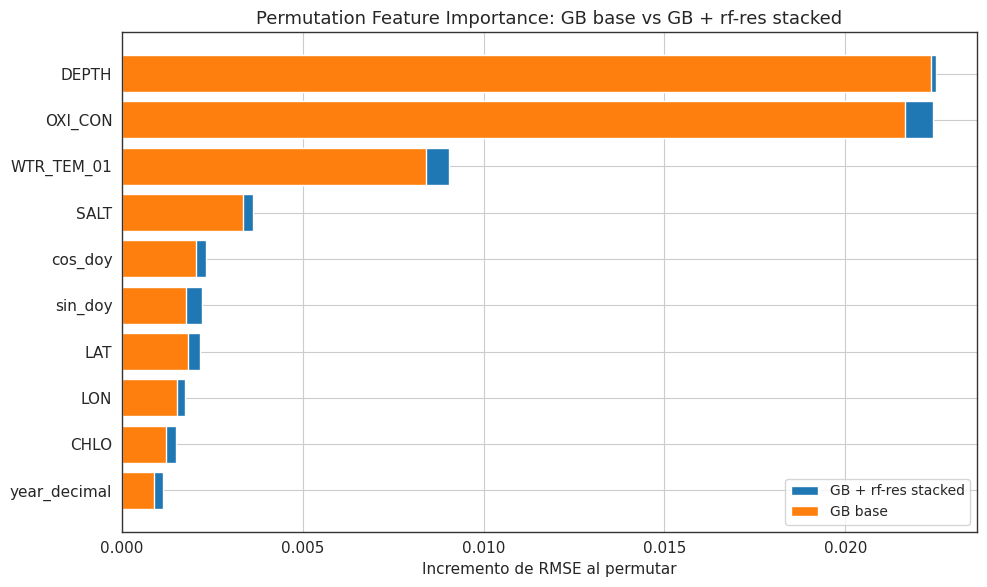

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def permutation_importance_manual(model_func, X, y, n_repeats=10):
    baseline_pred = model_func(X)
    baseline_rmse = np.sqrt(mean_squared_error(y, baseline_pred))
    importances = []

    for col in X.columns:
        scores = []
        X_permuted = X.copy()
        for _ in range(n_repeats):
            X_permuted[col] = np.random.permutation(X[col])
            pred = model_func(X_permuted)
            rmse = np.sqrt(mean_squared_error(y, pred))
            scores.append(rmse - baseline_rmse)
        importances.append([col, np.mean(scores), np.std(scores)])

    df_importance = pd.DataFrame(importances, columns=['Feature', 'Importance', 'Std']).sort_values(by='Importance', ascending=False)
    return df_importance


# Funciones predictoras
def predict_gb_base(X):
    return final_gb.predict(X)

def predict_final(X):
    """Predicción combinada: GB base + RF sobre residuos"""
    y_gb = final_gb.predict(X)
    y_final = y_gb + final_rf_resid.predict(X)
    return y_final

# Calcular importancia
feat_gb_base = permutation_importance_manual(predict_gb_base, X_all, y_all, n_repeats=10)
feat_stacked = permutation_importance_manual(predict_final, X_all, y_all, n_repeats=10)

# Merge para comparar
df_compare = feat_gb_base[['Feature', 'Importance']].merge(
    feat_stacked[['Feature', 'Importance']], on='Feature', suffixes=('_GB', '_Stacked')
).sort_values(by='Importance_Stacked', ascending=True)

# Plot comparativo
plt.figure(figsize=(10,6))
plt.barh(df_compare['Feature'], df_compare['Importance_Stacked'], alpha=1, label='GB + rf-res stacked')
plt.barh(df_compare['Feature'], df_compare['Importance_GB'], alpha=1, label='GB base')
plt.xlabel('Incremento de RMSE al permutar')
plt.title('Permutation Feature Importance: GB base vs GB + rf-res stacked')
plt.legend()
plt.tight_layout()
plt.show()

        Feature  Importance       Std
1         DEPTH    0.022335  0.000768
4       OXI_CON    0.022053  0.000784
2    WTR_TEM_01    0.008601  0.000256
0          SALT    0.003307  0.000081
9       cos_doy    0.001990  0.000103
8       sin_doy    0.001739  0.000125
5           LAT    0.001728  0.000107
6           LON    0.001437  0.000149
3          CHLO    0.001219  0.000060
7  year_decimal    0.000862  0.000048


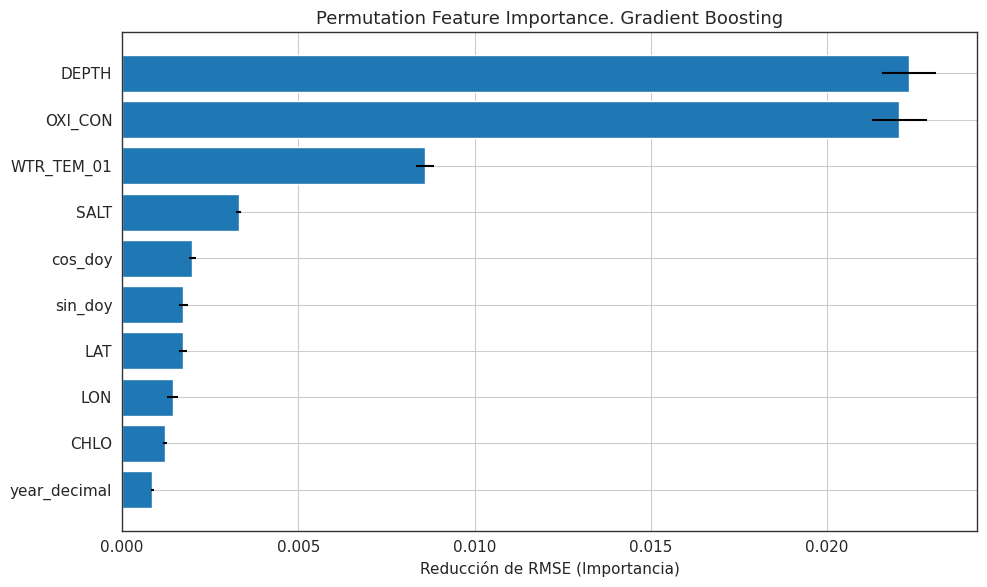

In [ ]:
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import matplotlib.pyplot as plt

# Permutation Feature Importance (GB base)

result = permutation_importance(
    final_gb, X_all, y_all,
    n_repeats=10,
    random_state=42,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

import pandas as pd
feat_importance = pd.DataFrame({
    'Feature': X_all.columns,
    'Importance': result.importances_mean,
    'Std': result.importances_std
}).sort_values(by='Importance', ascending=False)

print(feat_importance)

plt.figure(figsize=(10,6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'], xerr=feat_importance['Std'])
plt.xlabel('Reducción de RMSE (Importancia)')
plt.title('Permutation Feature Importance. Gradient Boosting')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


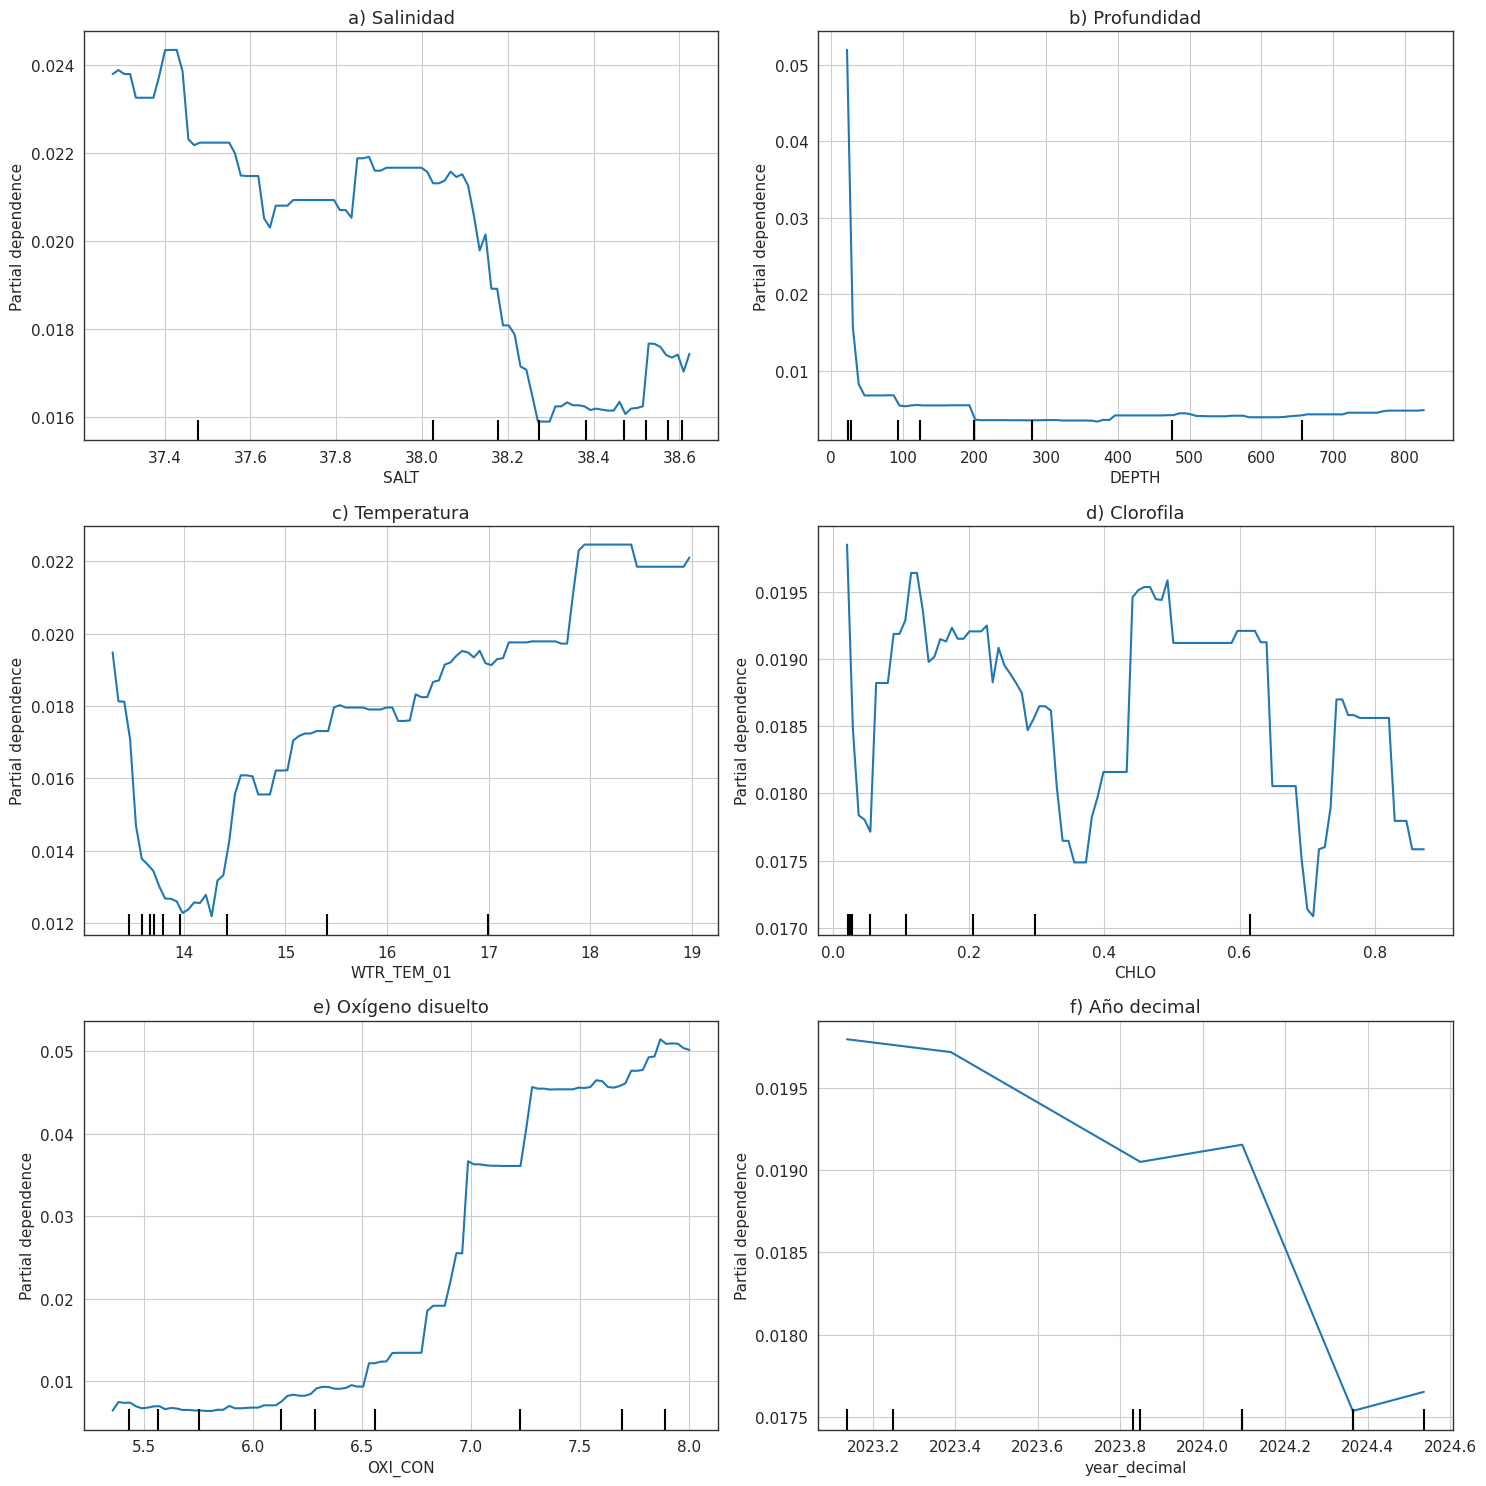

In [ ]:
# Diccionario variables
var_nombres = {
    'SALT': 'Salinidad',
    'DEPTH': 'Profundidad',
    'WTR_TEM_01': 'Temperatura',
    'CHLO': 'Clorofila',
    'OXI_CON': 'Oxígeno disuelto',
    'year_decimal': 'Año decimal'
}

# Partial Dependence Plots (PDP)
top_features = feat_importance['Feature'].head(6).tolist()
my_features = ['SALT', 'DEPTH', 'WTR_TEM_01', 'CHLO', 'OXI_CON', 'year_decimal']

pdp_features = list(dict.fromkeys(my_features))

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
ax = ax.flatten()

for i, feat in enumerate(pdp_features):
    disp = PartialDependenceDisplay.from_estimator(final_gb, X_all, [feat], ax=ax[i])
    letra = chr(ord('a') + i)  # a), b), c)...
    nombre_variable = var_nombres.get(feat, feat)
    ax[i].set_title(f"{letra}) {nombre_variable}")

plt.tight_layout()
plt.show()


/tmp/ipython-input-1036434695.py:9: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_all, plot_type="bar")


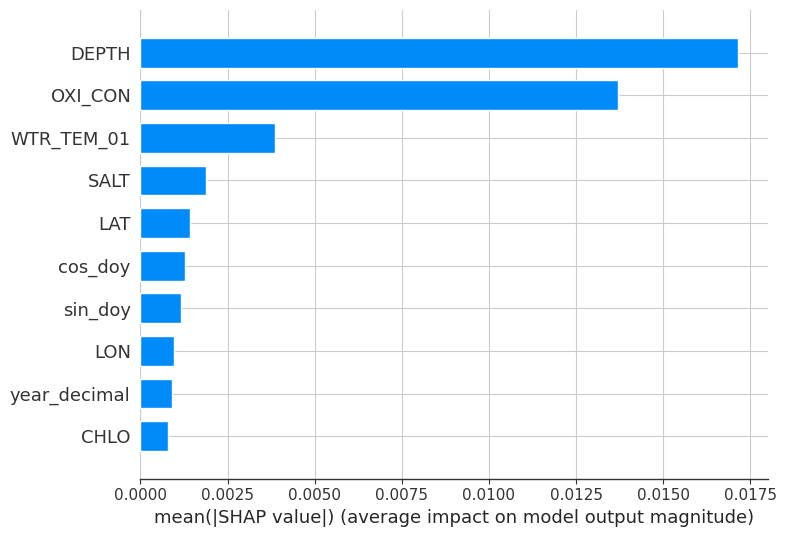

/tmp/ipython-input-1036434695.py:10: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_all)


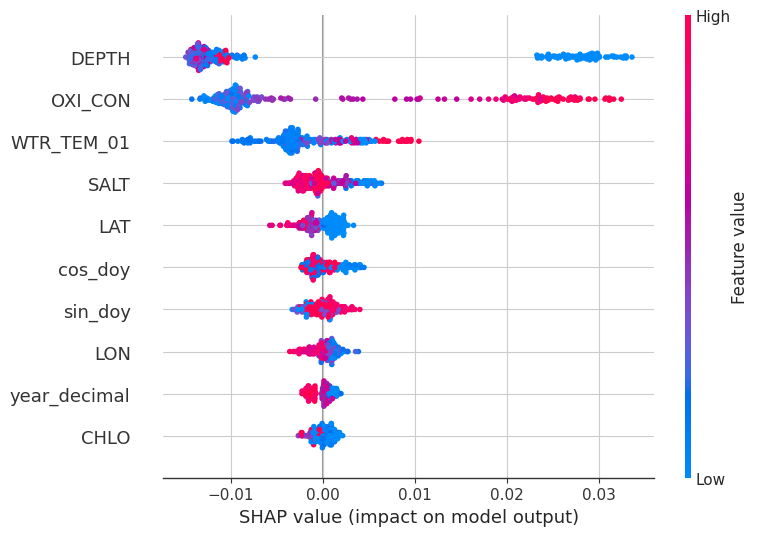

In [ ]:
import shap

# Explainer para Gradient Boosting
explainer = shap.TreeExplainer(final_gb)

# Calcular SHAP values
shap_values = explainer.shap_values(X_all)

shap.summary_plot(shap_values, X_all, plot_type="bar")
shap.summary_plot(shap_values, X_all)


Interpretabilidad local : Individual Conditional expectation

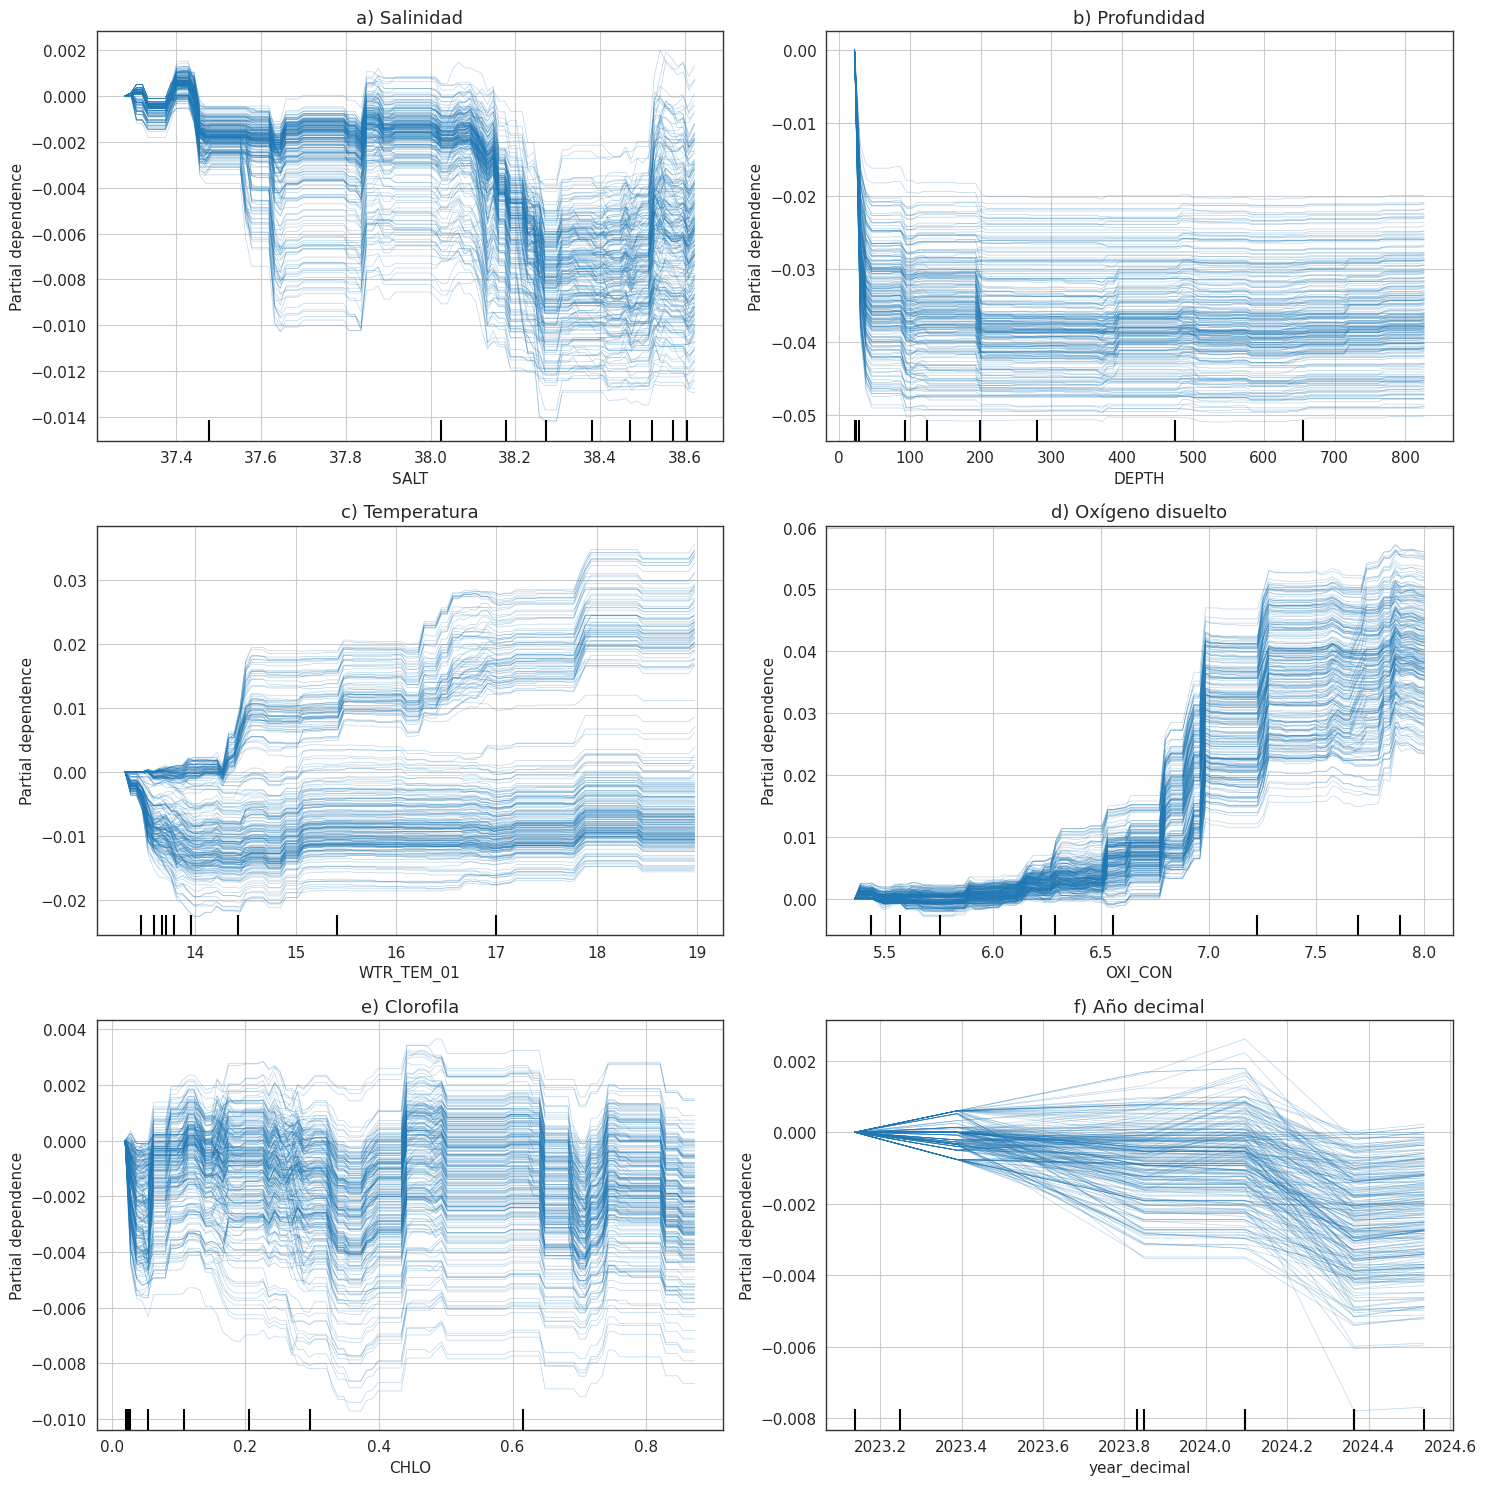

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt


var_nombres = {
    'SALT': 'Salinidad',
    'DEPTH': 'Profundidad',
    'WTR_TEM_01': 'Temperatura',
    'OXI_CON': 'Oxígeno disuelto',
    'CHLO': 'Clorofila',
    'year_decimal': 'Año decimal'
}

features_to_plot = ['SALT', 'DEPTH', 'WTR_TEM_01', 'OXI_CON', 'CHLO', 'year_decimal']

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
ax = ax.flatten()

# Generar ICE plots en cada subplot
for i, feat in enumerate(features_to_plot):
    PartialDependenceDisplay.from_estimator(
        final_gb,
        X_all,
        features=[feat],
        kind='individual',  # ICE plots
        subsample=250,
        random_state=42,
        centered=True,
        ax=ax[i]
    )

    letra = chr(ord('a') + i)

    nombre_variable = var_nombres.get(feat, feat)

    ax[i].set_title(f"{letra}) {nombre_variable}")
    ax[i].set_xlabel(nombre_variable)
    ax[i].set_ylabel('Predicción de pH')
    ax[i].grid(True)


plt.tight_layout()
plt.show()
